In [120]:
import skgeom as sg
import numpy as np


#calculate angle <point1_point2_point3
def get_angle(point1,point2,point3):
    #calculate dy,dx
    delta_y12 = point1.y() - point2.y()
    delta_y32 = point3.y() - point2.y()
    delta_x12 = point1.x() - point2.x()
    delta_x32 = point3.x() - point2.x()

    #initialize slopes
    slope1 = 0
    slope2 = 0
    angle = 0

    #if segment 1_2 is a vertical line, calculate the angle formed with segment 2_3 and the x-axis
    if delta_x12 == 0:
        
        #if segment 2_3 is also a vertical line
        if delta_x32 == 0:
            return 180
        
        point_x = sg.Point2(point2.x()+5, point2.y())

        #if point 1 and point 3 are in the first quadrant, calculate 90-angle formed with x-axis
        if(point3.x() > point2.x() and point3.y() < point2.y() and delta_y12 > 0):
            print('point 3: 1st, point1: 1st')
            angle = 90 - get_angle(point1,point2,point_x)
            return angle

        #if point 1 is in the first quadrant and point 3 is in the second quadrant, calculate 90+angle formed with x-axis
        elif(point3.x() > point2.x() and point3.y() > point2.y() and delta_y12 > 0):
            print('point 3: 2nd, point1: 1st')
            angle = 90 + get_angle(point1,point2,point_x)
            return angle

        #if point 1 is in the first quadrant and point 3 is in the third quadrant, calculate 90+angle formed with x-axis
        elif(point3.x() < point2.x() and point3.y() < point2.y() and delta_y12 >0):
            print('point3: 3rd, point 1: 1st')
            point_x = sg.Point2(point2.x()-5, point2.y())
            angle = 90 + get_angle(point_x,p2,p3)
            return angle
        
        #if point 1 and point 3 are in the third quadrant
        elif(point3.x() < point2.x() and point3.y() < point2.y() and delta_y12 < 0):
            point_x = sg.Point2(point2.x()-5, point2.y())
            print('point 3: 3rd, point 1: 3rd')
            angle = 90 - np.abs(get_angle(point_x,point2,point3))
            return angle

        #if point 1 is in third and 3 in fourth quadrants
        else:
            point_x = sg.Point2(point2.x()-5, point2.y())
            print('delta_x12 == 0: point 3: 4th, point 1: 3rd')
            angle = 90 + np.abs(get_angle(point_x,point2,point3))
            return angle


    #if segment 2_3 is a vertical line, calculate angle formed with segment 1_2 and the x-axis
    elif delta_x32 == 0:
        point_x = sg.Point2(point2.x()-5, point2.y())

        #if point 1 and point 3 are in the fourth quadrant, calculate angle formed with x-axis - 90
        if(point1.x() < point2.x() and point1.y() >= point2.y() and delta_y32 > 0):
            print('point 3: 4th, point1: 4th')
            angle = 90 - np.abs(get_angle(point_x,point2,point1))
            return angle

        #if point 3 is in the fourth quadrant and point 1 is in the third quadrant, calculate 90+angle formed with x-axis
        elif(point1.x() < point2.x() and point1.y() <= point2.y() and delta_y32 > 0):
            print('point 3: 4th, point1: 3rd')
            angle = 90 + np.abs(get_angle(point_x,point2,point1))
            return angle

        else:
            slope1 = float(delta_y12 / delta_x12)
            slope2 = float(delta_y32 / delta_x32)

            #if angle is with horizontal line
            if slope1 == 0 and slope2 != 0:
                if(point1.x() < point2.x() and point3.x() > point2.x()):
                    angle = math.pi - np.abs(np.arctan(slope2))
                else:
                    angle = np.arctan(slope2)
            elif slope2 == 0 and slope1 != 0:
                if(point1.x() < point2.x() and point3.x() > point2.x()):
                    angle = math.pi - np.abs(np.arctan(slope1))
                else:
                    angle = np.arctan(slope1)
            elif slope1 == -slope2:
                angle = math.pi/2
            else:
                angle = np.arctan((slope1-slope2)/(1+slope1*slope2))

    return angle*180/math.pi

p3 = sg.Point2(3,0)
p2 = sg.Point2(0,0)
p1 = sg.Point2(0,-3)
print(get_angle(p1,p2,p3))

delta_x12 == 0: point 3: 4th, point 1: 3rd
90.0


origin on arc: PointC2(0, 3)
point 3: 4th, point 1: 3rd
sector angle: 180.0
offset: 0 1/3: 60.0
150.0
PointC2(1.5, -2.59808)


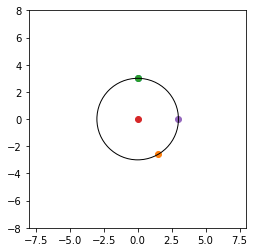

In [103]:
import skgeom as sg
import numpy as np

def get_arc_midpoint(pl1,p0,pr1,index,radius):
    origin_on_arc = sg.Point2(p0.x(),p0.y()+radius)
    print('origin on arc:',origin_on_arc)
    angle_sector = get_angle(pl1,p0,pr1)
    print('sector angle:',angle_sector)
    angle_offset = 0#get_angle(pl1,p0,origin_on_arc)
    if is_clockwise(pl1,origin_on_arc):
        angle_offset = -angle_offset
    angle_third = angle_sector/3
    print('offset:',angle_offset,'1/3:',angle_third)
    angle_of_interest = index*angle_third + angle_third/2 + angle_offset
    print(angle_of_interest)
    midpoint = sg.Point2(radius*np.sin(angle_of_interest*math.pi/180) + p0.x(),radius*np.cos(angle_of_interest*math.pi/180) + p0.y())
    
    draw(origin_on_arc)
    draw(midpoint)
    return midpoint

p0 = sg.Point2(-1,-1)
pl1 = sg.Point2(-4,-4)
pr1 = sg.Point2(2,-4)
radius = 3
p1 = sg.Point2(0,3)
p2 = sg.Point2(0,0)
p3 = sg.Point2(3,0)
print(get_arc_midpoint(p1,p2,p3,2,3))
circle = sg.Circle2(p2,radius*radius,sg.Sign.POSITIVE)
draw(circle)
draw(p1)
draw(p2)
draw(p3)

In [95]:
import skgeom as sg
import numpy as np

class skgeom_utilities:

    #return if point1 and point2 are clockwise
    def is_clockwise(self,v1,v2):
        return -v1.x()*v2.y() + v1.y()*v2.x() > 0

    #return the midpoint of fan-shaped area with index 'index'
    def get_arc_midpoint(self,pl1,p0,pr1,index,radius):
        
        #origin of the arc (x, y+radius)
        origin_on_arc = sg.Point2(p0.x(),p0.y()+radius)
        print('origin on arc:',origin_on_arc)
        
        #angle of the whole sector
        angle_sector = get_angle(pl1,p0,pr1)
        
        #angle of a fan-shaped area (one-third)
        angle_third = angle_sector/3
        
        #angle offset with the left point on the arc
        angle_offset = get_angle(pl1,p0,origin_on_arc)
        
        #if the left point is to the left of the origin of the arc, make angle offset negative 
        if is_clockwise(pl1,origin_on_arc):
            angle_offset = -angle_offset
        print('offset:',angle_offset,'1/3:',angle_third)
        
        #angle of fan-shaped area with index 'index'
        angle_of_interest = index*angle_third + angle_third/2 + angle_offset
        print(angle_of_interest)
        
        #midpoint of fan-shaped area with index 'index'
        midpoint = sg.Point2(radius*np.sin(angle_of_interest*math.pi/180) + p0.x(),radius*np.cos(angle_of_interest*math.pi/180) + p0.y())

        draw(origin_on_arc)
        draw(midpoint)
        return midpoint
    
    #calculate angle <point1_point2_point3
    def get_angle(self,point1,point2,point3):
        #calculate dy,dx
        delta_y12 = point1.y() - point2.y()
        delta_y32 = point3.y() - point2.y()
        delta_x12 = point1.x() - point2.x()
        delta_x32 = point3.x() - point2.x()

        #initialize slopes
        slope1 = 0
        slope2 = 0
        angle = 0

        #if segment 1_2 is a vertical line, calculate the angle formed with segment 2_3 and the x-axis
        if delta_x12 == 0:
            point_x = sg.Point2(point2.x()+5, point2.y())

            #if point 1 and point 3 are in the first quadrant, calculate 90-angle formed with x-axis
            if(point3.x() > point2.x() and point3.y() < point2.y() and delta_y12 > 0):
                print('point 3: 1st, point1: 1st')
                angle = 90 - get_angle(point1,point2,point_x)
                return angle

            #if point 1 is in the first quadrant and point 3 is in the second quadrant, calculate 90+angle formed with x-axis
            elif(point3.x() > point2.x() and point3.y() > point2.y() and delta_y12 > 0):
                print('point 3: 2nd, point1: 1st')
                angle = 90 + get_angle(point1,point2,point_x)
                return angle

            #if point 1 and point 3 are in the third quadrant
            elif(point3.x() < point2.x() and point3.y() < point2.y() and delta_y12 < 0):
                point_x = sg.Point2(point2.x()-5, point2.y())
                print('point 3: 3rd, point 1: 3rd')
                angle = 90 - np.abs(get_angle(point_x,point2,point3))
                return angle

            #if point 1 is in third and 3 in fourth quadrants
            else:
                point_x = sg.Point2(point2.x()-5, point2.y())
                print('point 3: 4th, point 1: 3rd')
                angle = 90 + np.abs(get_angle(point_x,point2,point3))
                return angle


        #if segment 2_3 is a vertical line, calculate angle formed with segment 1_2 and the x-axis
        elif delta_x32 == 0:
            point_x = sg.Point2(point2.x()-5, point2.y())

            #if point 1 and point 3 are in the fourth quadrant, calculate angle formed with x-axis - 90
            if(point1.x() < point2.x() and point1.y() >= point2.y() and delta_y32 > 0):
                print('point 3: 4th, point1: 4th')
                angle = 90 - np.abs(get_angle(point_x,point2,point1))
                return angle

            #if point 3 is in the fourth quadrant and point 1 is in the third quadrant, calculate 90+angle formed with x-axis
            elif(point1.x() < point2.x() and point1.y() <= point2.y() and delta_y32 > 0):
                print('point 3: 4th, point1: 3rd')
                angle = 90 + np.abs(get_angle(point_x,point2,point1))
                return angle

        else:
            slope1 = float(delta_y12 / delta_x12)
            slope2 = float(delta_y32 / delta_x32)

            #if angle is with horizontal line
            if slope1 == 0 and slope2 != 0:
                if(point1.x() < point2.x() and point3.x() > point2.x()):
                    angle = math.pi - np.abs(np.arctan(slope2))
                else:
                    angle = np.arctan(slope2)
            elif slope2 == 0 and slope1 != 0:
                if(point1.x() < point2.x() and point3.x() > point2.x()):
                    angle = math.pi - np.abs(np.arctan(slope1))
                else:
                    angle = np.arctan(slope1)
            elif slope1 == -slope2:
                angle = math.pi/2
            else:
                angle = np.arctan((slope1-slope2)/(1+slope1*slope2))

        return angle*180/math.pi